In [32]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [ ]:
pip install numpy

In [33]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

In [57]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

frames = gray(pims.open('cellimg.png'))


In [47]:
micron_per_pixel = 0.15192872980868
feature_diameter = 2.12 # um
radius = int(np.round(feature_diameter/2.0/micron_per_pixel))
if radius % 2 == 0:
    radius += 1
print('Using a radius of {:d} px'.format(radius))
frames

Using a radius of 7 px


(ImageReader,) processed through proc_func. Original repr:
    <Frames>
    Length: 1 frames
    Frame Shape: 3264 x 4912
    Pixel Datatype: uint8

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
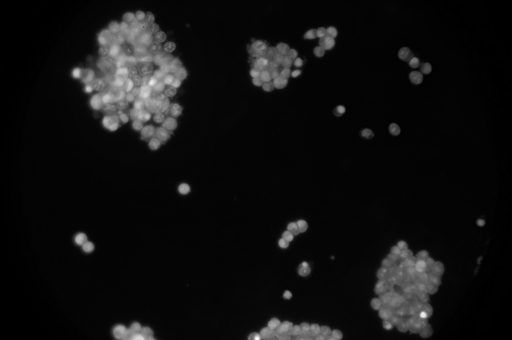

In [48]:
frames[0]

In [7]:
pip install jinja2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
# we use a slightly larger radius
f_locate = tp.locate(frames[0], radius+2, minmass=300)

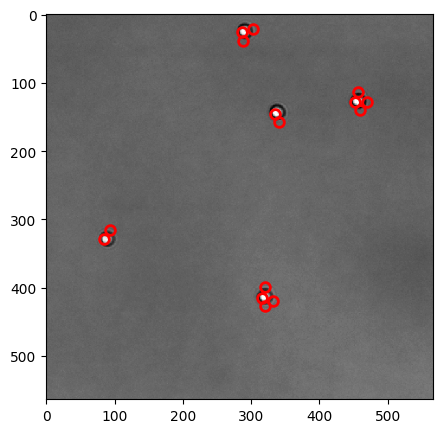

In [59]:
tp.annotate(f_locate, frames[0], plot_style={'markersize': radius});

In [61]:
f_locate = tp.locate(frames[0], radius+2, minmass=300)
f_bf_with_prev = tp.locate_brightfield_ring(frames[0], 2.0*radius+1, f_locate)

ValueError: List length should have same length as image dimensions.

In [62]:
f_bf = tp.locate_brightfield_ring(frames[0], 2.0*radius+1)


Text(0.5, 0, 'Number of cells: 5')

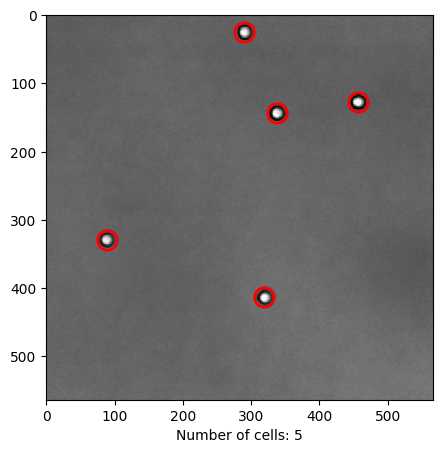

In [63]:
plt.figure()
tp.annotate(f_bf, frames[0], plot_style={'markersize': radius*2}, ax=plt.gca())
plt.xlabel('Number of cells: ' + str(len(f_bf)))